## DeepFace <br>

[Publication Link](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

In modern face recognition, the conventional pipeline consists of four stages: detect => align => represent => classify. We revisit both the alignment step and the representation step by employing explicit 3D face modeling in order to apply a piecewise affine transformation, and derive a face representation from a nine-layer deep neural network. This deep network involves more than 120 million parameters using several locally connected layers without weight sharing, rather than the standard convolutional layers. Thus we trained it on the largest facial dataset to-date, an identity labeled dataset of four million facial images belonging to more than 4,000 identities.

The learned representations coupling the accurate model-based alignment with the large facial database generalize remarkably well to faces in unconstrained environments, even with a simple classifier. Our method reaches an accuracy of 97.35% on the Labeled Faces in the Wild (LFW) dataset, reducing the error of the current state of the art by more than 27%, closely approaching human-level performance.



# Importing Libraries and Dependencies

In [0]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [1]:
!ls '/content/drive/My Drive/Face Recognition/Datasets/Rahul'

Rahul.jpg  Rony.jpeg


In [0]:
!pip install deepface

# Converting Image -> Numpy Array using DeepFace

In [0]:
from google.colab import files
uploaded = files.upload()

Saving musk.jpg to musk.jpg


In [0]:
face = DeepFace.detectFace("musk.jpg")
face.shape

(224, 224, 3)

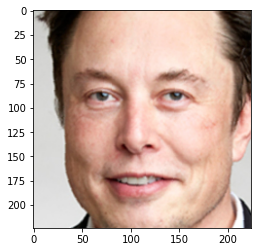

In [0]:
plt.imshow(face)

In [0]:
base_img = cv2.imread("musk.jpg")

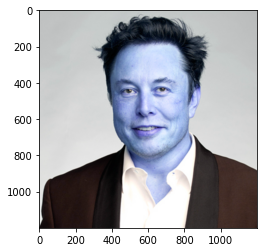

In [29]:
plt.imshow(base_img)

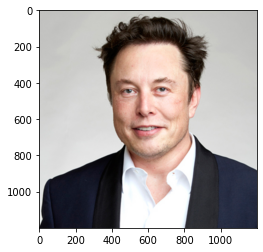

In [30]:
plt.imshow(base_img[:, :, ::-1])

# Single Face Comparison
*  Verify function under the DeepFace interface is used for face recognition.


Image - 1


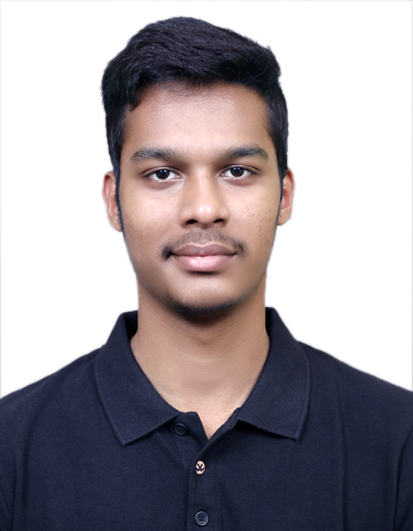


Image - 2


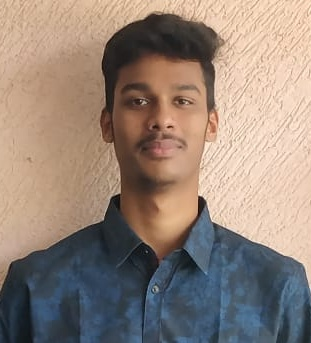


Image - 3


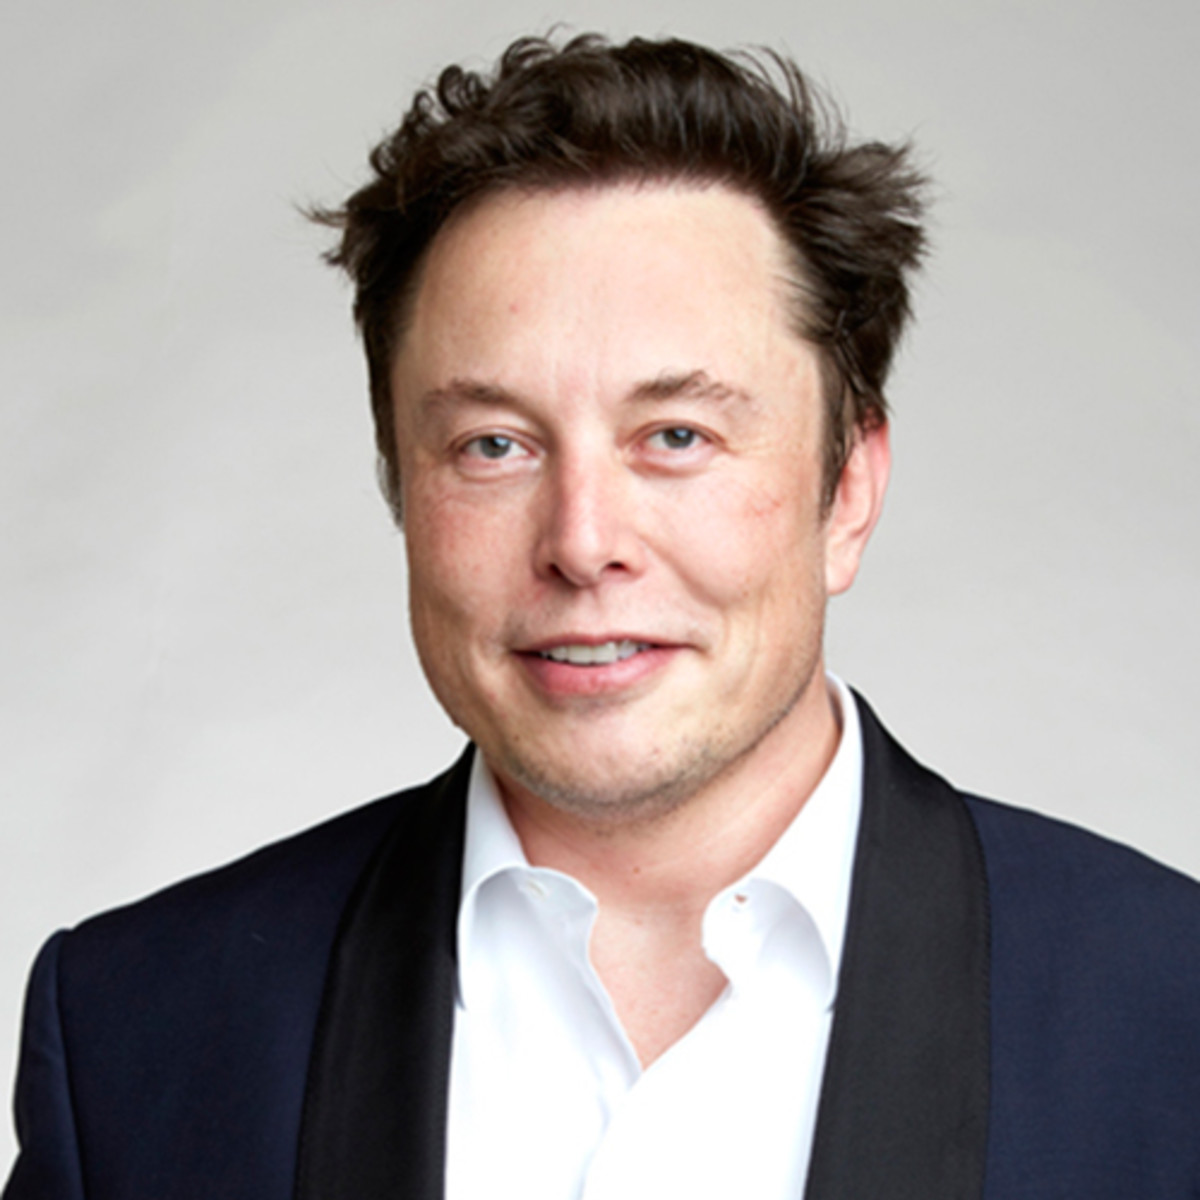


Image - 4


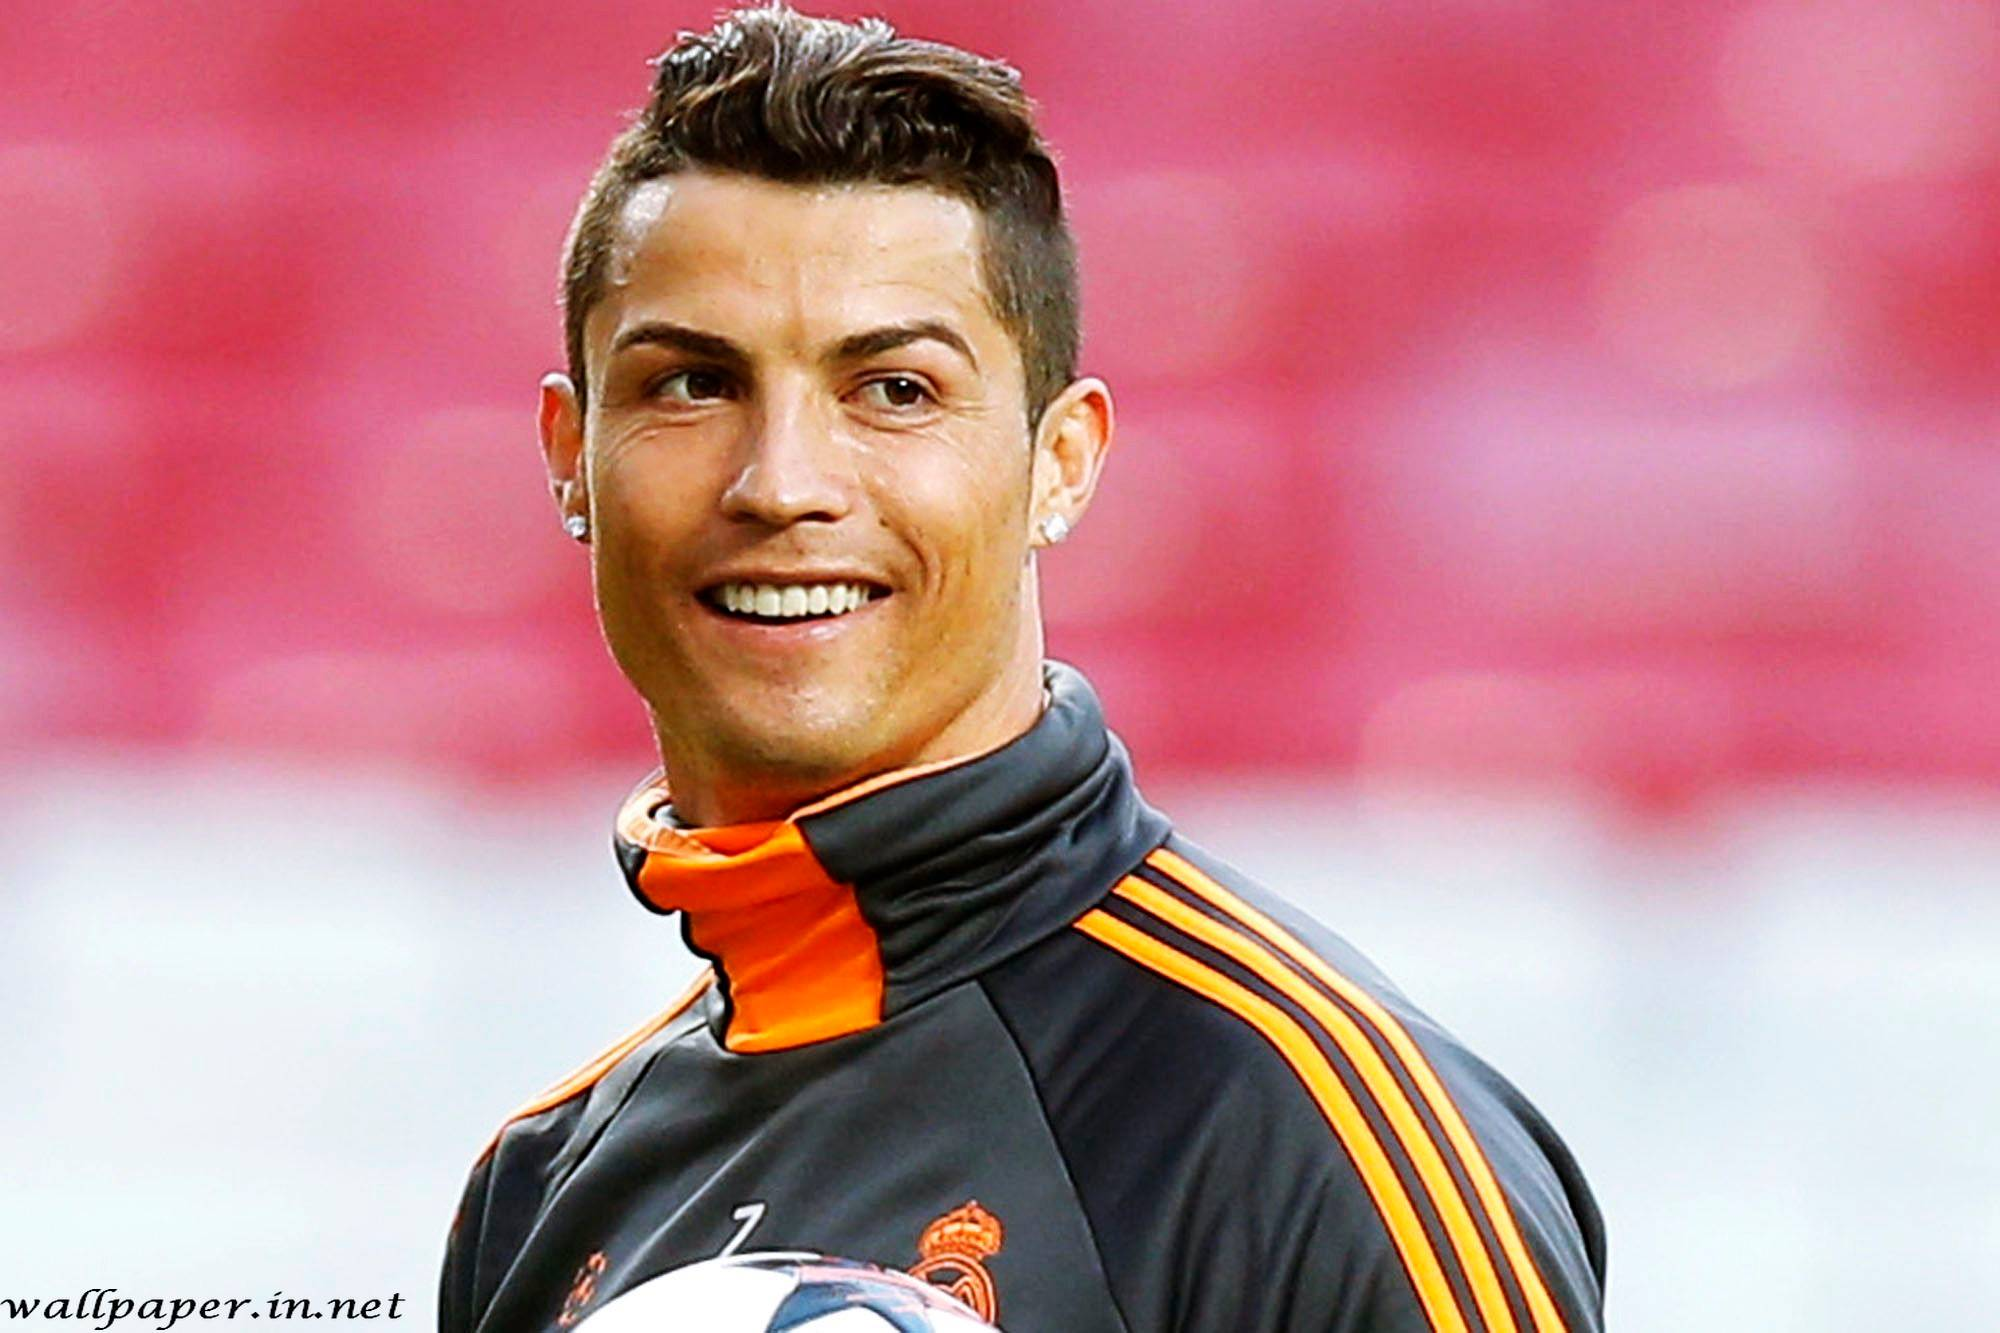

In [30]:
from IPython.display import Image, display
print("\nImage - 1")
display(Image("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg", width=200, height=200))
print("\nImage - 2")
display(Image("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rony.jpeg", width=200, height=200))
print("\nImage - 3")
display(Image("/content/drive/My Drive/Face Recognition/Datasets/Elon/musk.jpg", width=200, height=200))
print("\nImage - 4")
display(Image("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska_1.jpg", width=200, height=200))

In [20]:
from deepface import DeepFace

result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg", "/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rony.jpeg")
print("\nFor Image 1 vs Image 2")
print("\nIs verified: ", result["verified"])

result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg", "/content/drive/My Drive/Face Recognition/Datasets/Elon/musk.jpg")
print("\nFor Image 1 vs Image 3")
print("\nIs verified: ", result["verified"])

Using VGG-Face model backend and cosine distance.




Verification:   0%|          | 0/1 [00:00<?, ?it/s]



For Image 1 vs Image 2

Is verified:  True
Using VGG-Face model backend and cosine distance.




Verification:   0%|          | 0/1 [00:00<?, ?it/s]


For Image 1 vs Image 3

Is verified:  False


*  More than one Images at the Same time

In [22]:
dataset = [
	['/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg', '/content/drive/My Drive/Face Recognition/Datasets/Elon/musk.jpg'],      # Rahul vs Elon
  ['/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg', '/content/drive/My Drive/Face Recognition/Datasets/CR7/criska_1.jpg'],   # Rahul vs CR7
  ['/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg', '/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rony.jpeg']]    # Rahul vs Rahul
resp_obj = DeepFace.verify(dataset)

Using VGG-Face model backend and cosine distance.




Verification:   0%|          | 0/3 [00:00<?, ?it/s]

Verification:  33%|███▎      | 1/3 [00:00<00:01,  1.23it/s]

Verification:  67%|██████▋   | 2/3 [00:02<00:00,  1.00it/s]

Verification: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]


In [28]:
# Results
print("Result 1: ", resp_obj['pair_1']['verified'])
print("Result 2: ", resp_obj['pair_2']['verified'])
print("Result 3: ", resp_obj['pair_3']['verified'])

Result 1:  False
Result 2:  False
Result 3:  True


# Different Face Recognition Models Supported by DeepFace

VGG-Face (Default)

In [34]:
vggface_result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png", "/content/drive/My Drive/Face Recognition/Datasets/Elon/elon.jpg")
#vggface_result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png", "/content/drive/My Drive/Face Recognition/Datasets/Elon/elon.jpg", 
                                 #model_name = "VGG-Face") #identical to the line above
print("\nVerified? : ", vggface_result["verified"])

Using VGG-Face model backend and cosine distance.





Verification:   0%|          | 0/1 [00:00<?, ?it/s]


Verified? :  False


FaceNet

In [38]:
facenet_result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png", "/content/drive/My Drive/Face Recognition/Datasets/Elon/elon.jpg", model_name = "Facenet")
print("\nVerified? : ", facenet_result["verified"])

Using Facenet model backend cosine distance.





Verification:   0%|          | 0/1 [00:00<?, ?it/s]


Verified? :  False


OpenFace

In [39]:
openface_result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png", "/content/drive/My Drive/Face Recognition/Datasets/Elon/elon.jpg", model_name = "OpenFace")
print("\nVerified? : ", openface_result["verified"])

Using OpenFace model backend cosine distance.
openface_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1LSe1YCV1x-BfNnfb7DFZTNpv_Q9jITxn
To: /root/.deepface/weights/openface_weights.h5




0.00B [00:00, ?B/s]



15.3MB [00:00, 77.9MB/s]




Verification:   0%|          | 0/1 [00:01<?, ?it/s]


Verified? :  False


DeepFace

In [40]:
deepface_result = DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png", "/content/drive/My Drive/Face Recognition/Datasets/Elon/elon.jpg", model_name = "DeepFace")
print("\nVerified? : ", deepface_result["verified"])

Using FB DeepFace model backend cosine distance.
VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip




  0%|          | 0.00/511M [00:00<?, ?B/s]



  0%|          | 524k/511M [00:00<04:58, 1.71MB/s]



  0%|          | 2.10M/511M [00:00<03:40, 2.31MB/s]



  1%|▏         | 7.34M/511M [00:00<02:36, 3.23MB/s]



  3%|▎         | 13.6M/511M [00:00<01:51, 4.48MB/s]



  4%|▍         | 19.9M/511M [00:00<01:19, 6.16MB/s]



  5%|▌         | 25.7M/511M [00:00<00:58, 8.36MB/s]



  6%|▋         | 32.0M/511M [00:01<00:43, 11.1MB/s]



  7%|▋         | 37.7M/511M [00:01<00:32, 14.5MB/s]



  9%|▊         | 44.0M/511M [00:01<00:25, 18.4MB/s]



 10%|▉         | 50.3M/511M [00:01<00:20, 22.6MB/s]



 11%|█         | 56.6M/511M [00:01<00:16, 27.0MB/s]



 12%|█▏        | 62.9M/511M [00:01<00:14, 31.2MB/s]



 14%|█▎        | 69.2M/511M [00:01<00:12, 34.9MB/s]



 15%|█▍        | 


Verified? :  False


In [41]:
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

model = VGGFace.loadModel() #all face recognition models have loadModel() function in their interfaces
DeepFace.verify("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg", "/content/drive/My Drive/Face Recognition/Datasets/Elon/elon.jpg", model_name = "VGG-Face", model = model)






Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]


{'distance': 0.5984861552715302,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'verified': False}

# Facial Attribute Analysis

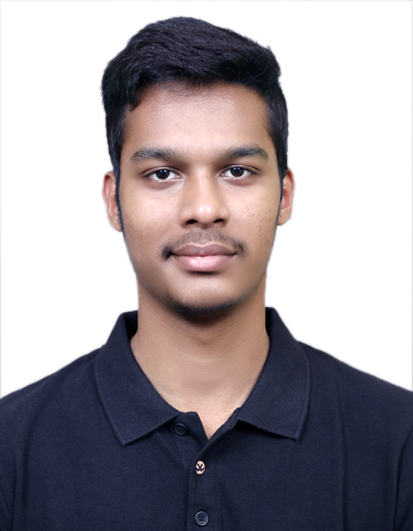

In [44]:
display(Image("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg", width=200, height=200))

In [5]:
from deepface import DeepFace

demography = DeepFace.analyze("/content/drive/My Drive/Face Recognition/Datasets/Rahul/Rahul.jpg")     #passing nothing as 2nd argument will find everything

#demography = DeepFace.analyze("img4.jpg", ['age', 'gender', 'race', 'emotion']) #identical to the line above
#demographies = DeepFace.analyze(["img1.jpg", "img2.jpg", "img3.jpg"]) #analyzing multiple faces same time

print("\nAge: ", demography["age"])
print("Gender: ", demography["gender"])
print("Emotion: ", demography["dominant_emotion"])
print("Race: ", demography["dominant_race"])

Actions to do:  ['emotion', 'age', 'gender', 'race']


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]


Age:  30.317494481531966
Gender:  Man
Emotion:  happy
Race:  indian


In [43]:
demography

{'age': 30.317494481531966,
 'dominant_emotion': 'happy',
 'dominant_race': 'indian',
 'emotion': {'angry': 0.024481693981215358,
  'disgust': 1.6369249195379276e-15,
  'fear': 6.40596820034034e-07,
  'happy': 95.5076813697815,
  'neutral': 4.467801749706268,
  'sad': 9.214980423166708e-06,
  'surprise': 2.896296109611285e-05},
 'gender': 'Man',
 'race': {'asian': 9.421596309136904,
  'black': 7.470009621382907,
  'indian': 60.988910316098966,
  'latino hispanic': 19.500545501774013,
  'middle eastern': 0.8621838040272956,
  'white': 1.7567627363518161}}

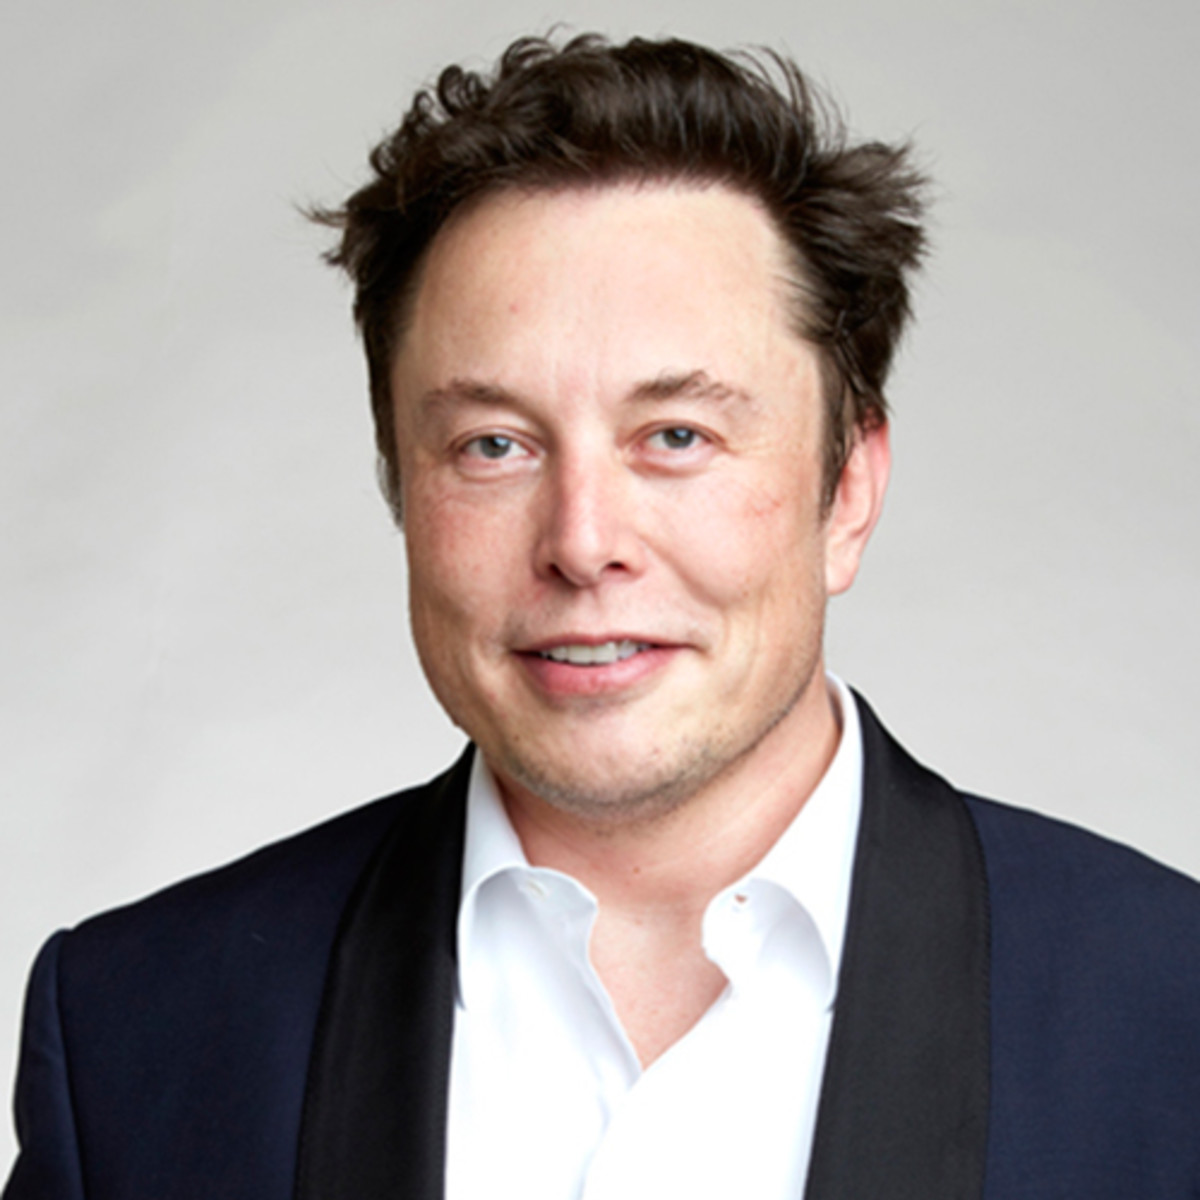

In [45]:
display(Image("/content/drive/My Drive/Face Recognition/Datasets/Elon/musk.jpg", width=200, height=200))

In [6]:
from deepface import DeepFace

demography = DeepFace.analyze("/content/drive/My Drive/Face Recognition/Datasets/Elon/musk.jpg")     #passing nothing as 2nd argument will find everything

#demography = DeepFace.analyze("img4.jpg", ['age', 'gender', 'race', 'emotion']) #identical to the line above
#demographies = DeepFace.analyze(["img1.jpg", "img2.jpg", "img3.jpg"]) #analyzing multiple faces same time

print("\nAge: ", demography["age"])
print("Gender: ", demography["gender"])
print("Emotion: ", demography["dominant_emotion"])
print("Race: ", demography["dominant_race"])

Actions to do:  ['emotion', 'age', 'gender', 'race']


Analyzing:   0%|          | 0/1 [00:01<?, ?it/s]


Age:  42.49083013529946
Gender:  Man
Emotion:  neutral
Race:  asian


In [47]:
demography

{'age': 42.49083013529946,
 'dominant_emotion': 'neutral',
 'dominant_race': 'asian',
 'emotion': {'angry': 0.02060027327388525,
  'disgust': 1.2535753768361246e-06,
  'fear': 1.242686528712511,
  'happy': 0.5797596648335457,
  'neutral': 96.86955213546753,
  'sad': 1.2870769016444683,
  'surprise': 0.0003289927235528012},
 'gender': 'Man',
 'race': {'asian': 40.90044308895551,
  'black': 1.9779189925886402,
  'indian': 2.7043210844014784,
  'latino hispanic': 27.250468462649767,
  'middle eastern': 6.578672638097687,
  'white': 20.588174988248944}}

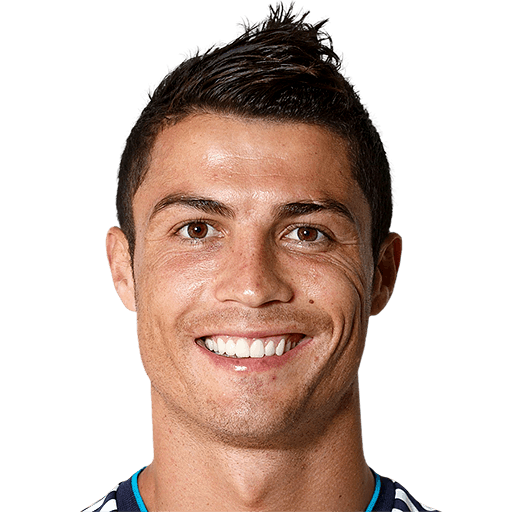

In [48]:
display(Image("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png", width=200, height=200))

In [8]:
from deepface import DeepFace

demography = DeepFace.analyze("/content/drive/My Drive/Face Recognition/Datasets/CR7/criska.png")     #passing nothing as 2nd argument will find everything

#demography = DeepFace.analyze("img4.jpg", ['age', 'gender', 'race', 'emotion']) #identical to the line above
#demographies = DeepFace.analyze(["img1.jpg", "img2.jpg", "img3.jpg"]) #analyzing multiple faces same time

print("\n")
print("Age: ", demography["age"])
print("Gender: ", demography["gender"])
print("Emotion: ", demography["dominant_emotion"])
print("Race: ", demography["dominant_race"])

Actions to do:  ['emotion', 'age', 'gender', 'race']


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]



Age:  31.943815716287194
Gender:  Man
Emotion:  happy
Race:  white


In [9]:
demography

{'age': 31.943815716287194,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 3.420737814101987e-11,
  'disgust': 3.535197316352916e-23,
  'fear': 1.3917902758800828e-15,
  'happy': 99.99988079071045,
  'neutral': 0.00011875232530655921,
  'sad': 1.0021800056492225e-08,
  'surprise': 1.521503517794287e-10},
 'gender': 'Man',
 'race': {'asian': 0.0027760053853853606,
  'black': 0.0015650066416128539,
  'indian': 0.05914806970395148,
  'latino hispanic': 5.928841978311539,
  'middle eastern': 19.893962144851685,
  'white': 74.11370873451233}}

# Streaming and Real Time Analysis

In [0]:
from deepface import DeepFace
DeepFace.stream("/content/drive/My Drive/Face Recognition/Datasets/Rahul")